<h1><center>Examen 1</center></h1>
<h2><center>K Nearest Neighbors (KNN)</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Import libraries

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

pd.options.display.float_format = '{:.2f}'.format

pie_colors = ['#F08080', '#CCCCFF', '#9FE2BF']
countplot_colors = ['#a6b1f7', '#ffcc99', '#DAF7A6']
violinplot_colors = ['#FF5733', '#dbff33', '#ffbd33', '#33dbff']

# Load Data Set

In [149]:
df = pd.read_csv("../DB/BD Titanic Completa.csv")

print(f"Total instances: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

df

Total instances: 1309
Total features: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.925,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.00,0,A.5. 3236,8.05,S,NaN,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,S,NaN
1307,1308,0,3,"Ware, Mr. Frederick",male,0.00,0,359309,8.05,S,NaN,NaN


# Exploratory Data Analysis

In [150]:
df.shape

(1309, 12)

In [151]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [152]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           241
Embarked       1039
dtype: int64

In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp
count,1309.00,1309.00,1309.00,1309.00,1309.00
mean,655.00,0.38,2.29,23.97,0.45
std,378.02,0.48,0.84,17.47,0.93
min,1.00,0.00,1.00,0.00,0.00
25%,328.00,0.00,2.00,8.00,0.00
50%,655.00,0.00,3.00,24.00,0.00
75%,982.00,1.00,3.00,35.00,1.00
max,1309.00,1.00,3.00,80.00,9.00


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   object 
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   object 
 10  Cabin        1068 non-null   object 
 11  Embarked     270 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 122.8+ KB


# Remove unnecesary features from the dataset

Convert categorical data into numerical data and use its median to fill the data from the 'Fare' feature

In [155]:
# Dictionary
fare_replacements = {
    'Q': '',
    'C': '',
    'S': '',
    'B102': '',
    'B78': '',
    'C47': '',
    'C52': '',
    'C92': '',
    'C128': '',
    'C126': '',
    'C124': '',
    'C95': '',
    'F E69': '',
    'F E46': '',
    'F38': '',
    'E33': '',
    'E46': '',
    'A32': '',
    'A19': '',
    'A14': '',
    'E101': '',
    'D': '',
    'D21': '',
    'D34': '',
    'D45': ''
}

In [156]:
# Apply the replacements
for pattern, replacement in fare_replacements.items():
    df['Fare'] = df['Fare'].str.replace(pattern, replacement)

# Replace empty strings with NaN
df['Fare'].replace('', np.nan, inplace=True)

# Convert the column to float
df['Fare'] = df['Fare'].astype(float)

# Impute missing values with the median
median_value = df['Fare'].median()
df['Fare'].fillna(median_value, inplace=True)

In [157]:
# Dictionary
parch_replacements = {
    'S.C./A.4.': '',
    'PC': '',
    'LP': '',
    'SOTON/OQ': '',
    'SOTON/O.Q.': '',
    'SOTON/O.Q': '',
    'A.2.': '',
    'A. 2.': '',
    'A/4.': '',
    'A4.': '',
    'A/5.': '',
    'A.5.': '',
    'A/5': '',
    'A./5.': '',
    'A/S': '',
    'AQ/4': '',
    'C43': '',
    'Fa.': '',
    'CA.': '',
    'C.A.': '',
    'SC/A.3': '',
    'SC/PARIS': '',
    'S.O./P.P.': '',
    'W./C.': '',
    'F.C.C.': '',
    'F.C.': ''
}

In [158]:
# Apply the replacements
for pattern, replacement in parch_replacements.items():
    df['Parch'] = df['Parch'].str.replace(pattern, replacement)

# Replace empty strings with NaN
df['Parch'].replace('', np.nan, inplace=True)

# Convert the column to float
df['Parch'] = df['Parch'].astype(float)

# Impute missing values with the median
median_value = df['Parch'].median()
df['Parch'].fillna(median_value, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   float64
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1068 non-null   object 
 11  Embarked     270 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


/tmp/ipykernel_10157/2951466353.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Parch'] = df['Parch'].str.replace(pattern, replacement)


<AxesSubplot: >

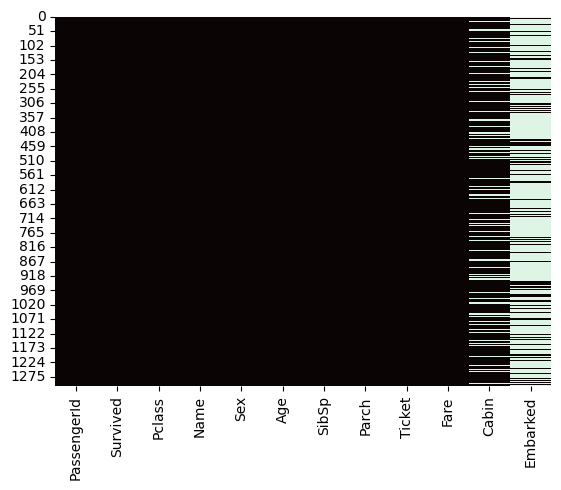

In [159]:
sns.heatmap(df.isnull(),cmap='mako',cbar = False)

# Data Insigths

Survival Percentage

In [160]:
sur = df['Survived'].value_counts()
survival_rate = [sur[0]/len(df)*100,sur[1]/len(df)*100]

Text(0.5, 1.0, 'Survival Chart')

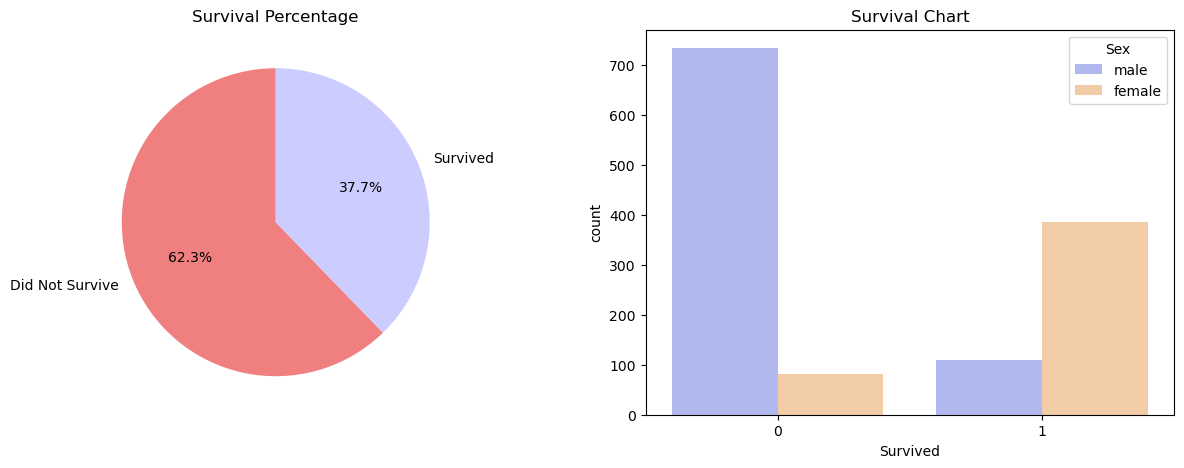

In [161]:
fig,ax = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(survival_rate, labels = ['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Survival Percentage')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Survived', hue='Sex', palette=countplot_colors)
plt.title('Survival Chart')

Survival percentage by gender

In [162]:
survived_male = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])/len(df[df['Sex'] == 'male'])*100
survived_female = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])/len(df[df['Sex'] == 'female'])*100
male = [survived_male, 100-survived_male]
female = [survived_female, 100-survived_female]

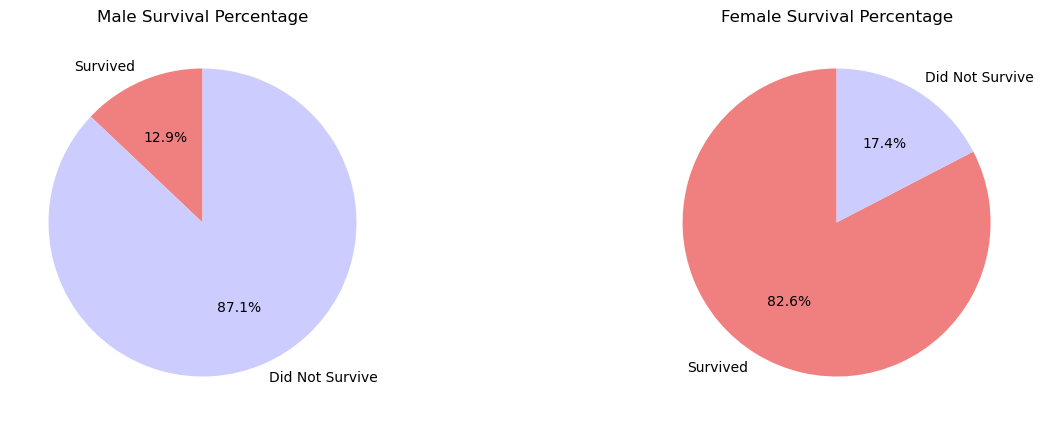

In [163]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(male, labels = ['Survived', 'Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Male Survival Percentage')

plt.subplot(1,2,2)
plt.pie(female,labels = ['Survived', 'Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Female Survival Percentage')
plt.show()


Survival percentage by passenger class

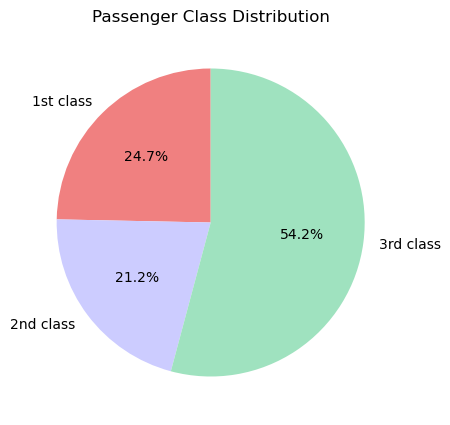

In [164]:
plt.subplots(figsize = (15,5))
Pclass = [len(df[(df['Pclass'] == 1)])/len(df)*100, len(df[(df['Pclass'] == 2)])/len(df)*100, len(df[(df['Pclass'] == 3)])/len(df)*100]

plt.pie(Pclass, labels = ['1st class', '2nd class', '3rd class'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)

plt.title('Passenger Class Distribution')
plt.show()

In [165]:
survived_class_1 = len(df[(df['Pclass'] == 1) & df['Survived'] == 1])/len(df[(df['Pclass'] == 1)])*100
survived_class_2 = len(df[(df['Pclass'] == 2) & df['Survived'] == 1])/len(df[(df['Pclass'] == 2)])*100
survived_class_3 = len(df[(df['Pclass'] == 3) & df['Survived'] == 1])/len(df[(df['Pclass'] == 3)])*100
class_1 = [survived_class_1,100-survived_class_1]
class_2 = [survived_class_2,100-survived_class_2]
class_3 = [survived_class_3,100-survived_class_3]

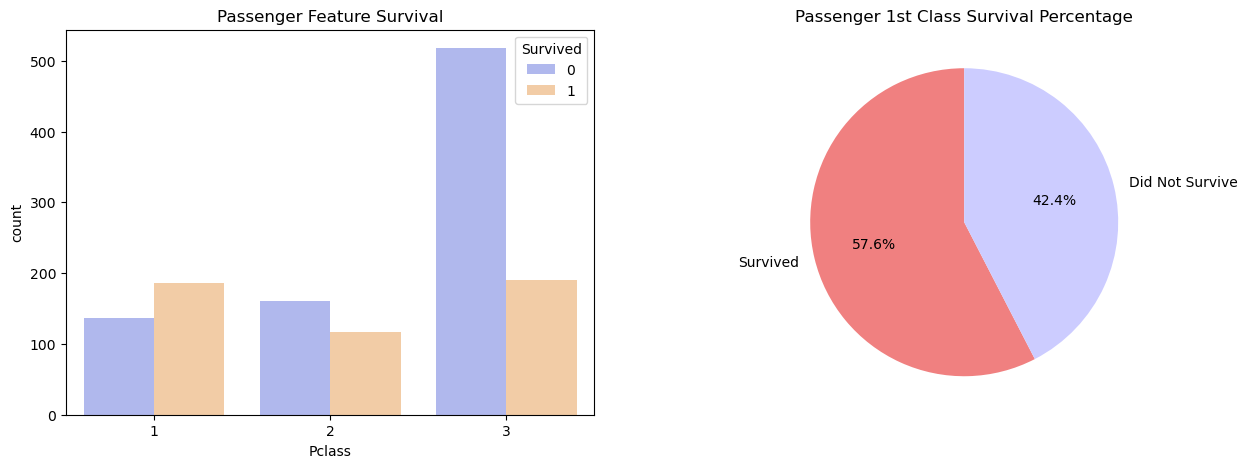

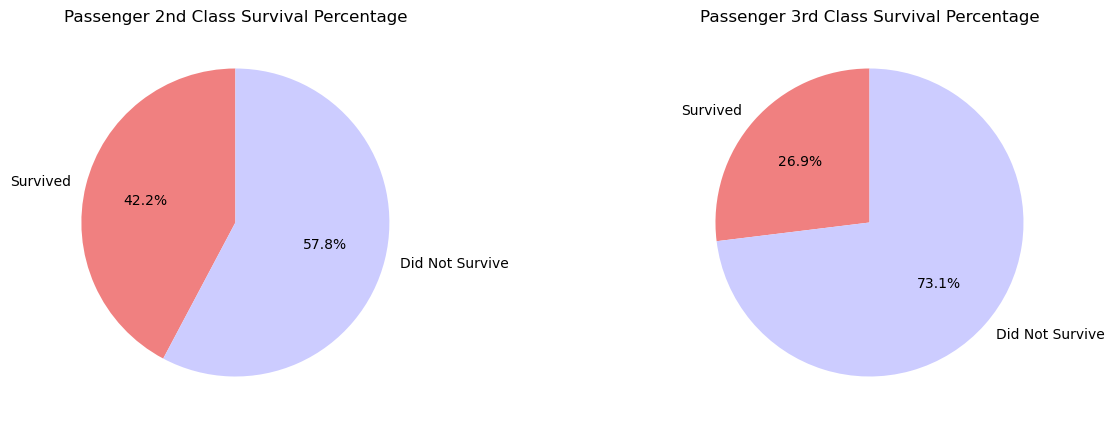

In [166]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Pclass', data = df, hue = 'Survived', palette=countplot_colors)
plt.title('Passenger Feature Survival',)
plt.subplot(1,2,2)
plt.pie(class_1,labels = ['Survived','Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Passenger 1st Class Survival Percentage')
plt.show()


fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(class_2, labels = ['Survived','Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Passenger 2nd Class Survival Percentage')
plt.subplot(1,2,2)
plt.pie(class_3, labels = ['Survived','Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Passenger 3rd Class Survival Percentage')
plt.show()

Embarked survival percentage

In [167]:
survived_S = len(df[(df['Embarked'] == 'S') & (df['Survived'] == 1)])/len(df[df['Embarked'] == 'S'])*100
survived_C = len(df[(df['Embarked'] == 'C') & (df['Survived'] == 1)])/len(df[df['Embarked'] == 'C'])*100
survived_Q = len(df[(df['Embarked'] == 'Q') & (df['Survived'] == 1)])/len(df[df['Embarked'] == 'Q'])*100
S = [survived_S,100-survived_S]
C = [survived_C,100-survived_C]
Q = [survived_Q,100-survived_Q]

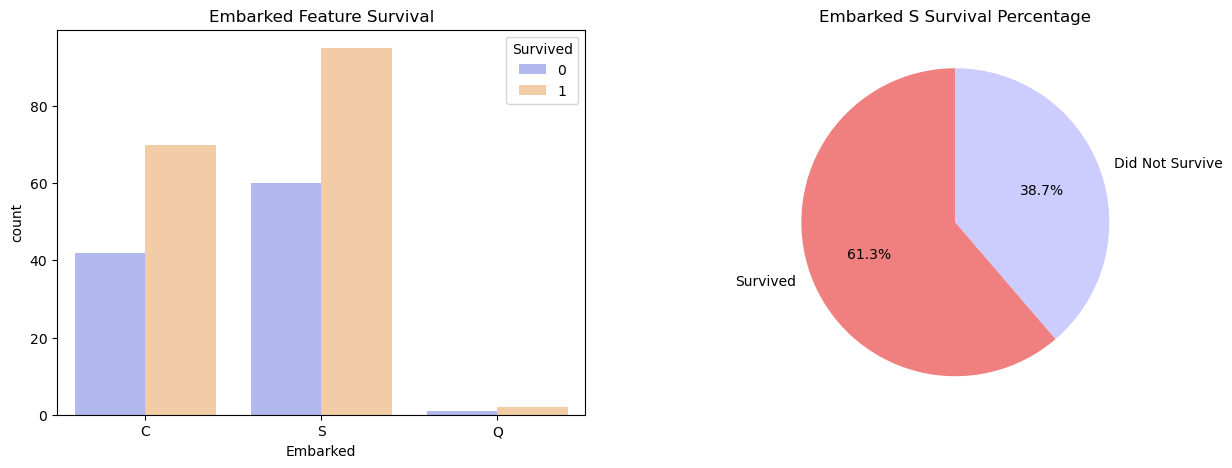

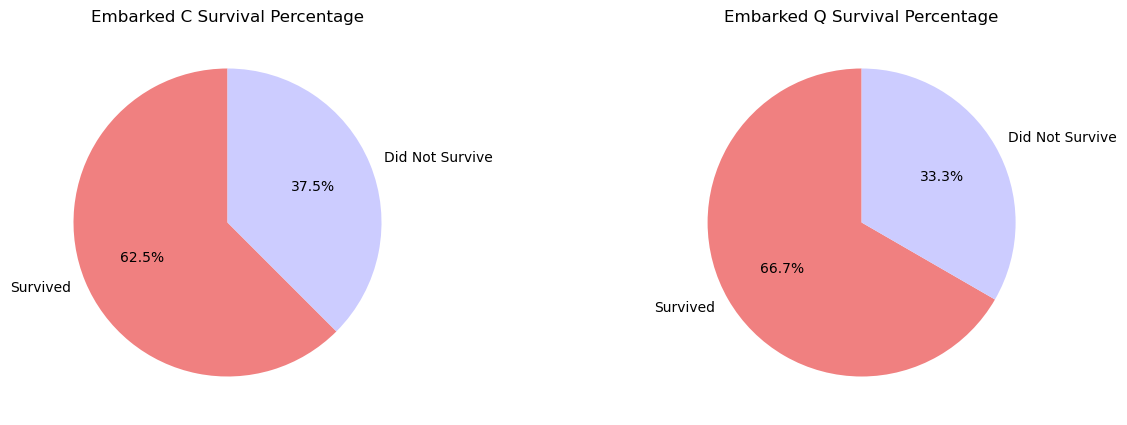

In [168]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Embarked', data = df, hue = 'Survived', palette=countplot_colors)
plt.title('Embarked Feature Survival')
plt.subplot(1,2,2)
plt.pie(S,labels = ['Survived', 'Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Embarked S Survival Percentage')
plt.show()


fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(C,labels = ['Survived','Did Not Survive'], autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Embarked C Survival Percentage')
plt.subplot(1,2,2)
plt.pie(Q,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%', startangle = 90, colors=pie_colors)
plt.title('Embarked Q Survival Percentage')
plt.show()

Fare and survival

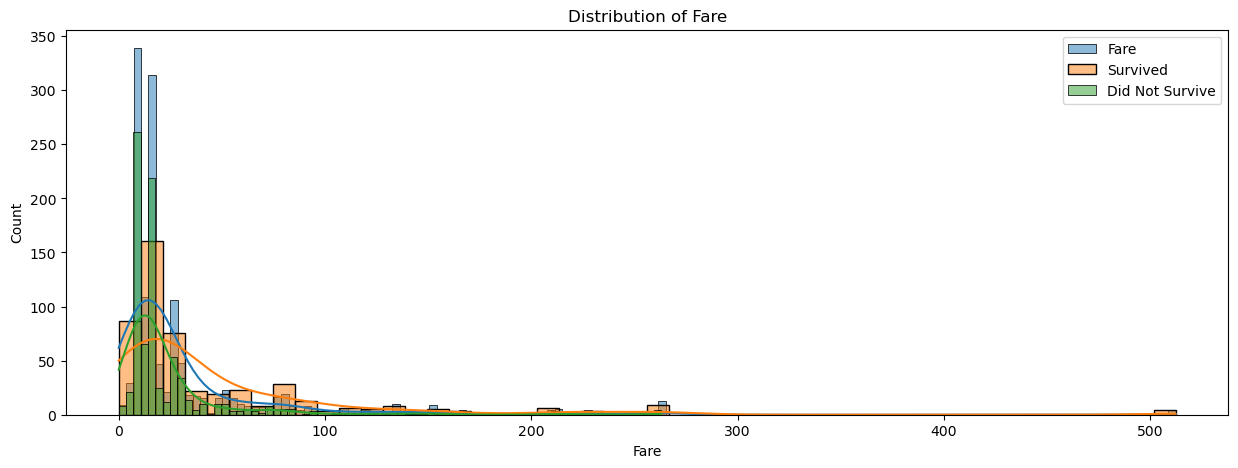

In [169]:
fig,ax = plt.subplots(figsize = (15,5))

sns.histplot(df['Fare'], label='Fare', kde=True)
sns.histplot(df[df['Survived'] == 1]['Fare'], label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Fare'], label='Did Not Survive', kde=True)

plt.title('Distribution of Fare')
plt.legend()
plt.show()

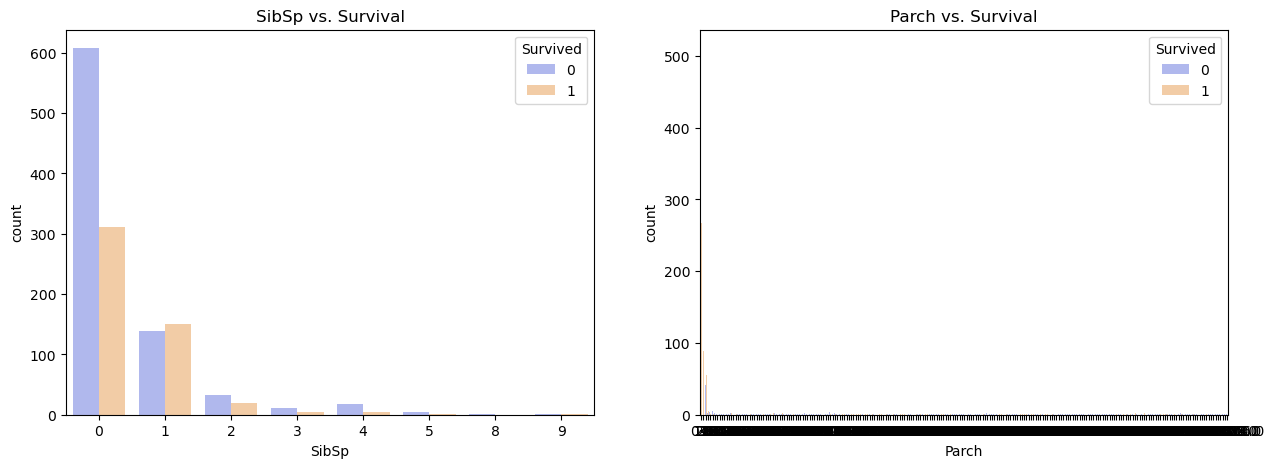

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
                       
plt.subplot(1, 2, 1)
sns.countplot(x='SibSp', data=df, hue='Survived', palette=countplot_colors)
plt.title('SibSp vs. Survival')

plt.subplot(1, 2, 2)
sns.countplot(x='Parch', data=df, hue='Survived', palette=countplot_colors)
plt.title('Parch vs. Survival')

plt.show()

Age and survival

In [171]:
def get_age_group(dataframe,column_name):    
    dataframe[column_name] = dataframe[column_name].apply(np.ceil)
    age_group = {0:list(range(0,21)),1:list(range(21,41)),2:list(range(41,61)),3:list(range(61,81))}
    col = list(dataframe.columns)
    index = col.index(column_name)
    age = []
    
    for j in range(len(dataframe)):
        for k in age_group.keys():
            for i in range(len(age_group[k])):
                if (age_group[k][i] == dataframe.iloc[j,index]):
                    age.append(k)
    dataframe['Age_Group'] = age


get_age_group(df,'Age')

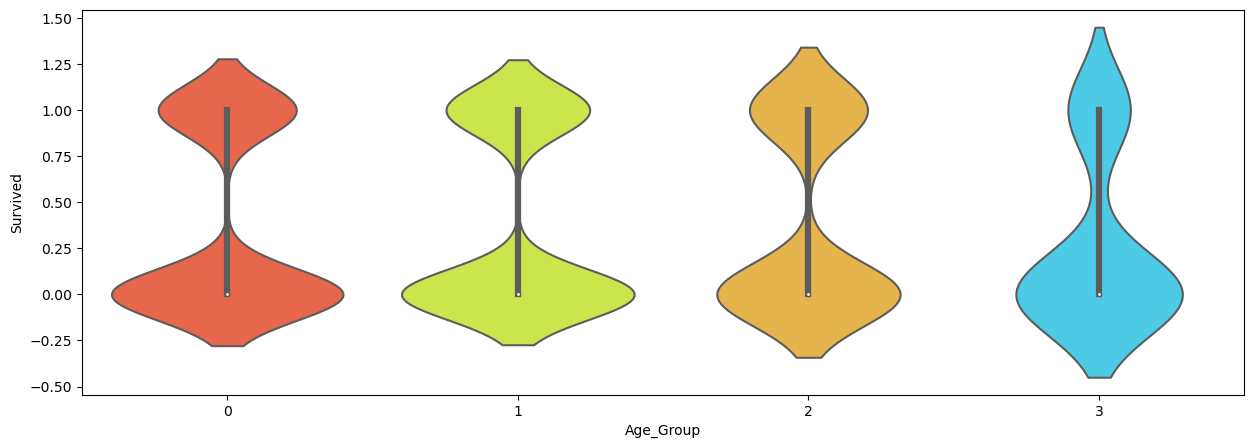

In [172]:
plt.subplots(figsize = (15,5))
sns.violinplot(x='Age_Group', y='Survived', data=df, palette=violinplot_colors)

plt.show()

Fare and Age Survival

<AxesSubplot: xlabel='Age', ylabel='Fare'>

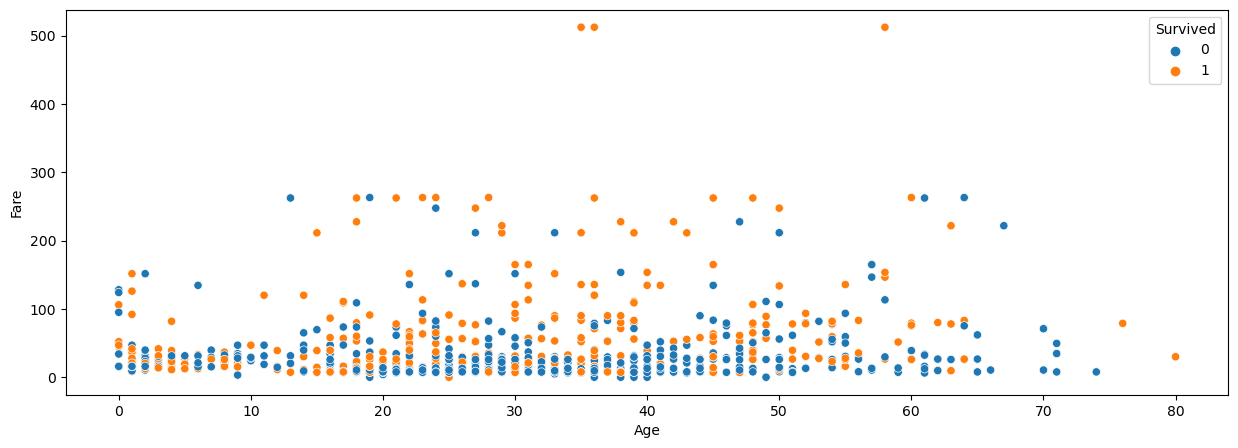

In [173]:
plt.subplots(figsize = (15,5))

sns.scatterplot(x='Age', y='Fare', data = df, hue = 'Survived')

Title and Age Survival

In [174]:
def get_initials(dataframe,column_name):
    sub = []
    initials = ['Mrs.','Ms.','Mr.','Miss.','Master.','Lady.','Don.','Rev.','Dr.','Mme.','Major.','Sir.','Mlle.','Col.','Capt.','Countess.','Jonkheer.','Dona.']
    name = dataframe[column_name]
    
    for i in range(len(name)):
        split_names = name[i].split()
        for j in range(len(split_names)):
            if (split_names[j] in initials):
                sub.append(split_names[j])
    dataframe[column_name] = sub


get_initials(df,'Name')
df['Name'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Name, dtype: int64

/tmp/ipykernel_10157/2229934898.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Name'] == values]['Age'], label = keys, kde = False)


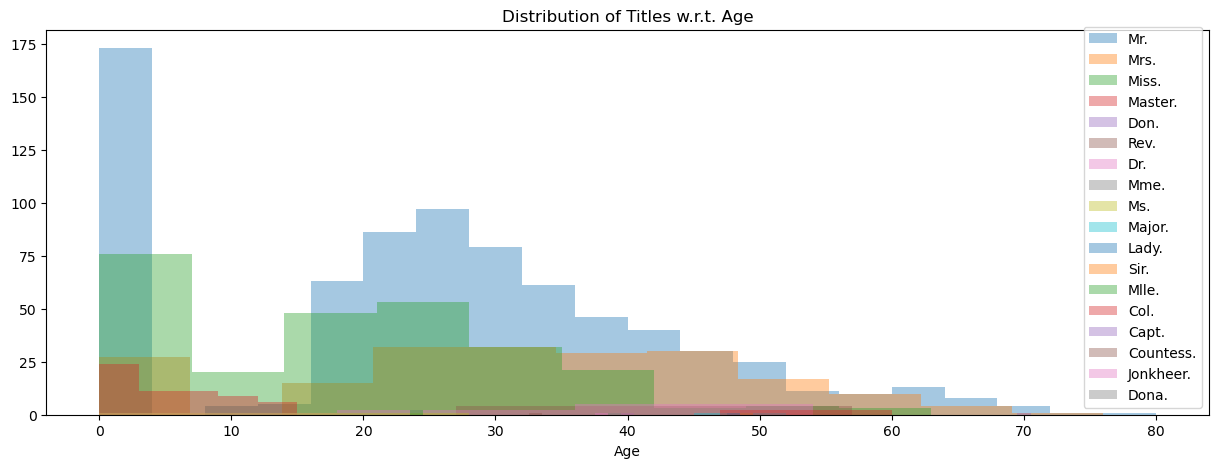

In [175]:
le = LabelEncoder()

df['Name'] = le.fit_transform(df['Name'])
encoded_values = df['Name'].unique()
decoded_values = le.inverse_transform(encoded_values)
initials = {}

for i in range(len(encoded_values)):
    initials.setdefault(decoded_values[i],encoded_values[i])


plt.subplots(figsize = (15,5))

for keys,values in initials.items():
    sns.distplot(df[df['Name'] == values]['Age'], label = keys, kde = False)

plt.title('Distribution of Titles w.r.t. Age')
plt.legend()
plt.show()

/tmp/ipykernel_10157/3656471956.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Name'] == values]['Age_Group'],label = keys,kde = False)


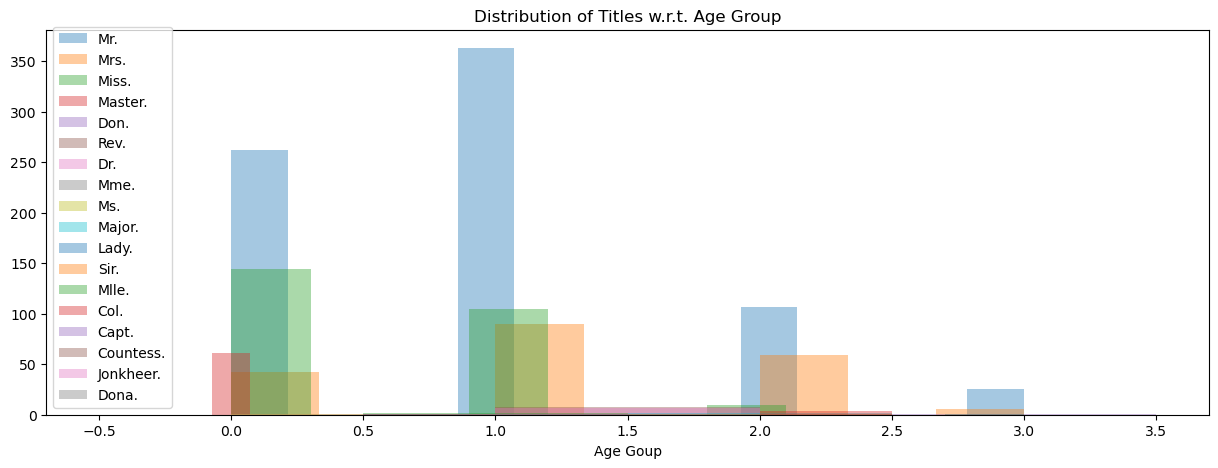

In [176]:
plt.subplots(figsize = (15,5))

for keys,values in initials.items():
    sns.distplot(df[df['Name'] == values]['Age_Group'],label = keys,kde = False)

plt.xlabel('Age Goup')
plt.title('Distribution of Titles w.r.t. Age Group')
plt.legend()
plt.show()

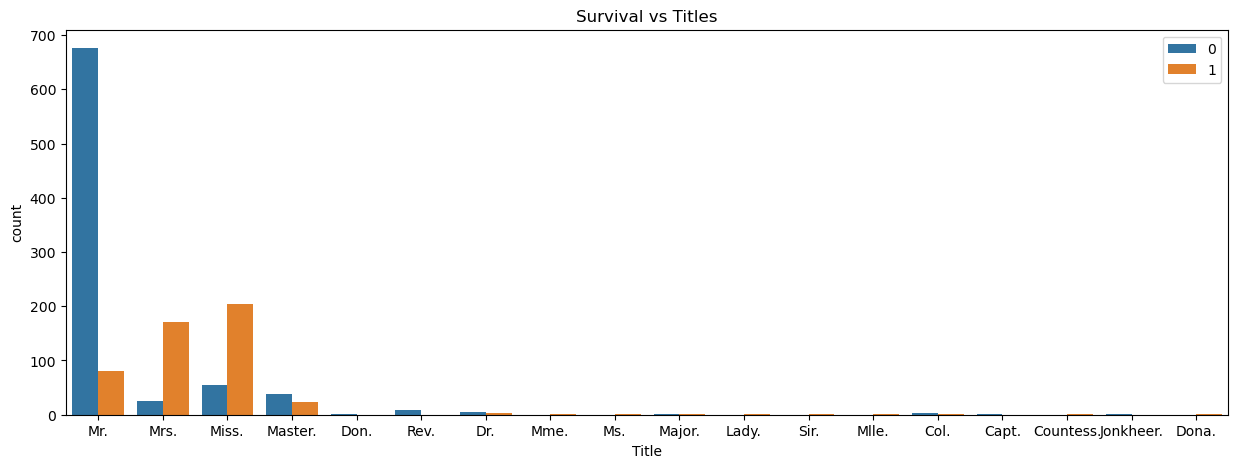

In [177]:
df['Name'] = le.inverse_transform(df['Name'])

plt.subplots(figsize = (15,5))
sns.countplot(x='Name', data = df, hue = 'Survived')
plt.xlabel('Title')
plt.title('Survival vs Titles')
plt.legend()
plt.show()

# Feature Selection

<AxesSubplot: >

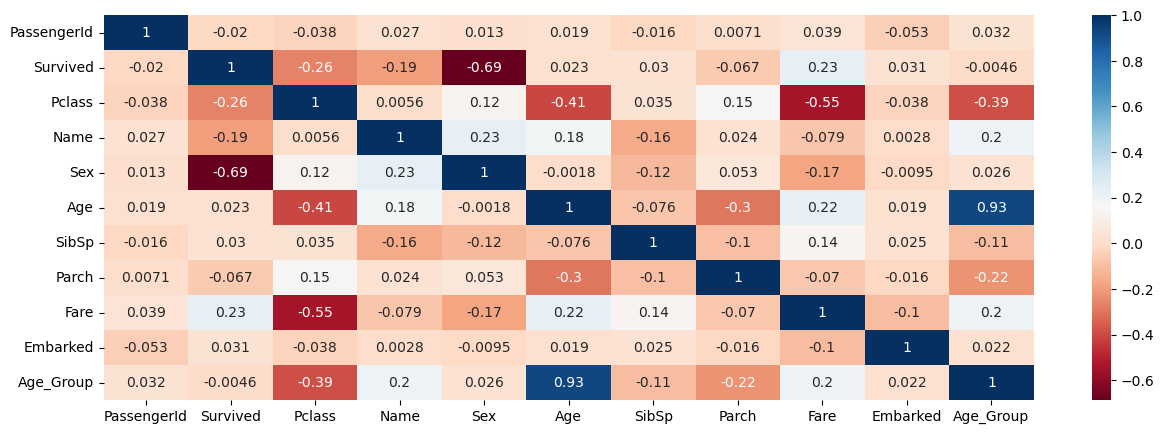

In [178]:
# Converting categorical values into numerical values
df['Name'] = le.fit_transform(df['Name'])
df['Sex'] = le.fit_transform(df['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
df['Embarked'] = df['Embarked'].fillna('Q')
df['Embarked'] = le.fit_transform(df['Embarked'])

plt.subplots(figsize = (15,5))
sns.heatmap(df.corr(),cmap = 'RdBu',cbar = True,annot = True)

In [179]:
df = df.drop(columns = ['PassengerId', 'Ticket', 'Cabin', 'Age_Group', 'Embarked','SibSp','Parch', "Name"])

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.00,7.25
1,1,1,0,38.00,71.28
2,1,3,0,26.00,7.92
3,1,1,0,35.00,53.10
4,0,3,1,35.00,8.05


# Using chi² test

In [180]:
features = df.iloc[:,1:]
target = df.iloc[:,0]

In [181]:
best_features = SelectKBest(score_func=chi2, k = 4)
fit = best_features.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(8,'Score'))

   Column   Score
3    Fare 5424.52
1     Sex  220.82
0  Pclass   28.04
2     Age    8.46


In [182]:
X = df.drop(columns=["Survived"])
Y = df["Survived"].to_numpy()

# Manual feaure selection

In [183]:
X_manual = X[["Sex", "Age", "Pclass"]]

# Pearson Feature selection

In [184]:
X_pearson = X[["Sex", "Fare", "Pclass"]]

In [185]:
X_manual = X_manual.to_numpy()
X_manual_train, X_manual_test, Y_manual_train, Y_manual_test = train_test_split(X_manual, Y, test_size=0.30, random_state=445)

X_pearson = X_pearson.to_numpy()
X_pearson_train, X_pearson_test, Y_pearson_train, Y_pearson_test = train_test_split(X_pearson, Y, test_size=0.30, random_state=445)

# K Nearest Neighbours

In [186]:
class KNNClassifier:

    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.Y_train = None

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            if self.distance_metric == "euclidean":
                distances = np.linalg.norm(self.X_train - x_test, axis=1)
            elif self.distance_metric == "manhattan":
                distances = np.sum(np.abs(self.X_train - x_test), axis=1)
            
            sorted_indexes = distances.argsort()[:self.k]
            sorted_labels = self.Y_train[sorted_indexes]
            predicted_label = np.bincount(sorted_labels).argmax()
            predictions.append(predicted_label)
        return np.array(predictions)

# Model evaluation

In [187]:
def evaluate_classifier(predictions: np.ndarray, actual: np.ndarray, title: str):

    cm = confusion_matrix(actual, predictions)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap='Blues')
    plt.title(title)
    
    filename = f"./figures/{title.lower().replace(' ', '_')}.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(actual, predictions)
    recall = recall_score(actual, predictions)
    precision = precision_score(actual, predictions)
    f1 = f1_score(actual, predictions)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1: {f1:.4f}")

In [188]:
def display_predictions(X, predictions, actual, title):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = {0: 'r', 1: 'b'}  # Map labels to colors

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=[colors[label] for label in actual], marker="o", label="Real labels")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=[colors[label] for label in predictions], marker="x", label="Predicted labels")
    
    ax.set_title(title)
    ax.legend()
    
    filename = f"./figures/{title.lower().replace(' ', '_')}.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Model testing

Pearson feature selection

In [189]:
pearson_knn = KNNClassifier(k=3)
pearson_knn.fit(X_pearson_train, Y_pearson_train)
pearson_predictions = pearson_knn.predict(X_pearson_test)

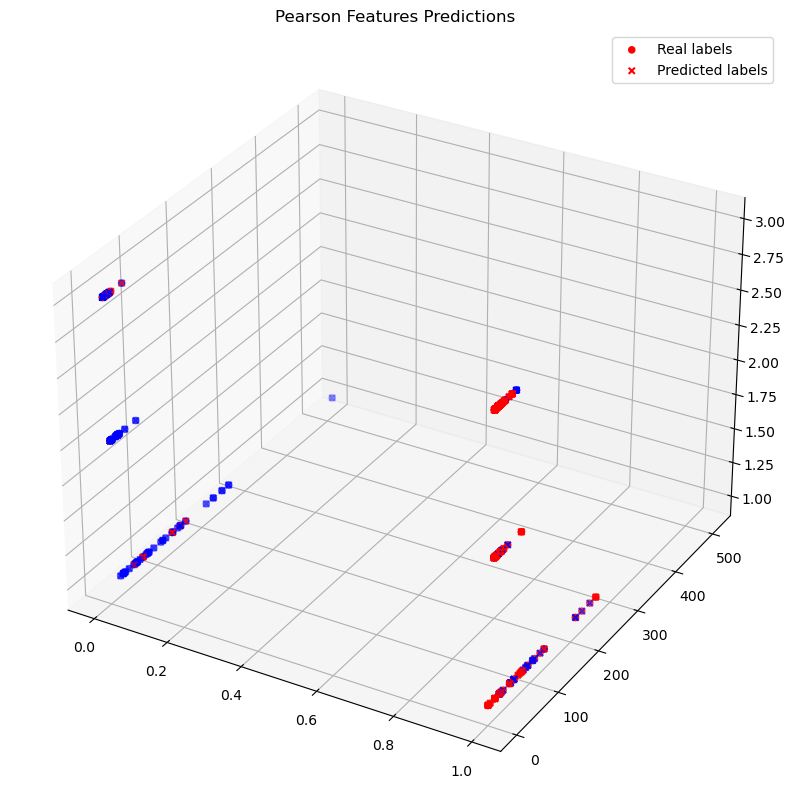

In [190]:
display_predictions(X_pearson_test, pearson_predictions, Y_pearson_test, title="Pearson Features Predictions")

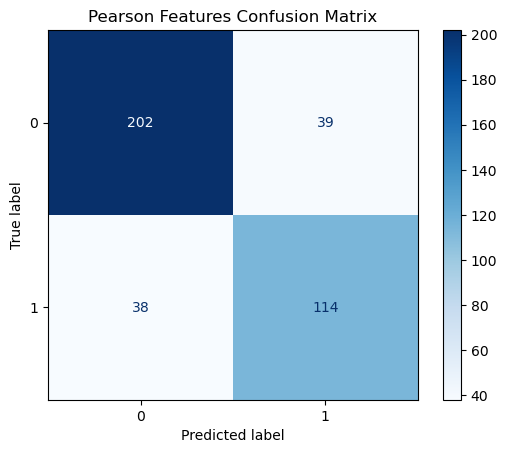

Accuracy: 0.8041
Recall: 0.7500
Precision: 0.7451
F1: 0.7475


In [191]:
evaluate_classifier(pearson_predictions, Y_pearson_test, title="Pearson Features Confusion Matrix")

Manual feature selection

In [192]:
manual_knn = KNNClassifier(k=3)
manual_knn.fit(X_manual_train, Y_manual_train)
predictions = manual_knn.predict(X_manual_test)

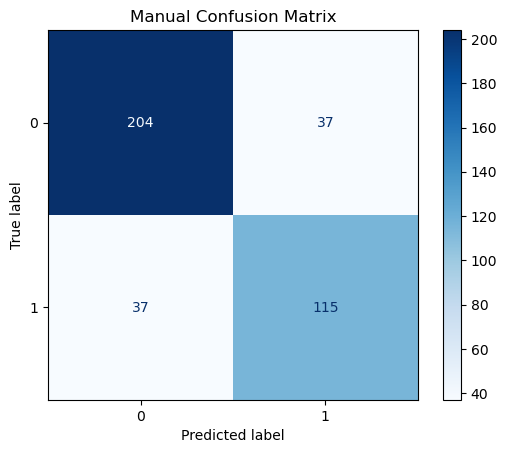

Accuracy: 0.8117
Recall: 0.7566
Precision: 0.7566
F1: 0.7566


In [193]:
evaluate_classifier(predictions, Y_manual_test, title="Manual Confusion Matrix")

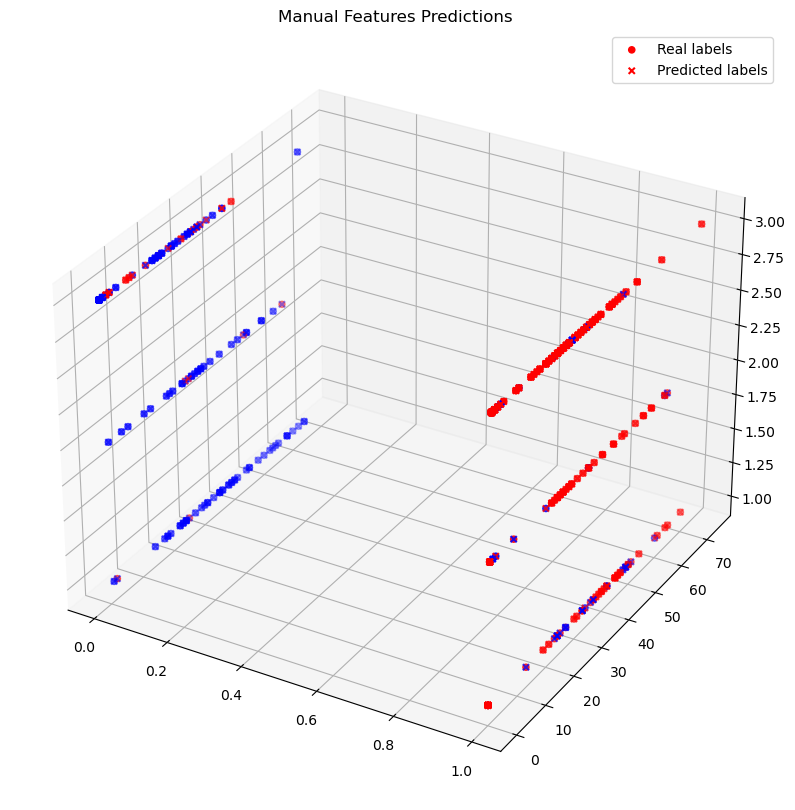

In [194]:
display_predictions(X_manual_test, predictions, Y_manual_test, title="Manual Features Predictions")